# Decision Tree Classifier

Importing Libraries

In [54]:
import pandas as pd
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt 

Load the dataset

In [44]:
data = pd.read_csv('D:\Barath Suresh Docs\PROGRAMMING\MACHINE LEARNING\creditcard.csv')
maxele =  len(data)
print(maxele," rows")

284807  rows


Spliting the dataset into features (X) and target (y) and split them into training and test set

<Axes: xlabel='Class', ylabel='count'>

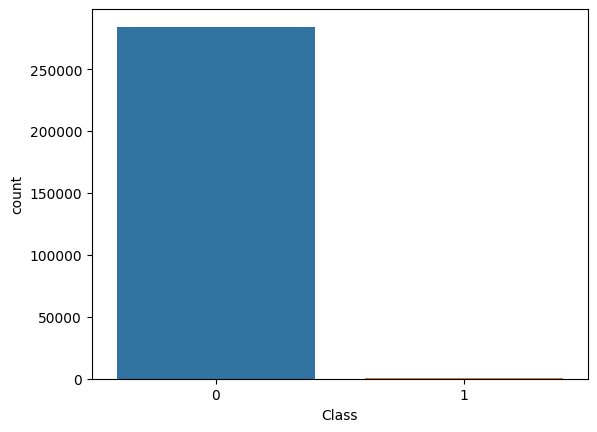

In [45]:
X = data.iloc[:, :-1]
y = data.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
sns.countplot(x='Class',data=data)

Feature Scaling

In [51]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

Creating a decision tree classifier and training

In [47]:
dtc = DecisionTreeClassifier(max_depth=4,random_state=42,criterion='entropy')
dtc.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=42)

Make predictions on testing data

In [48]:
y_pred = dtc.predict(X_test)
print(y_pred)

[1 0 0 ... 0 0 0]


Calculating the accuracy score, Classification report and confusion matrix and producing the results

In [62]:
acc_score = accuracy_score(y_test, y_pred)
clf_report = classification_report(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
f1_sc = f1_score(y_test, y_pred)
print("Accuracy score: {:.2f}%".format(acc_score*100))
print("F1 Score: {:.2f}%".format(f1_sc*100))
# print("Classification report: \n", clf_report)
# print("Confusion matrix: \n", cm)

Accuracy score: 99.94%
F1 Score: 81.59%


Visualizing the Confusion matrix

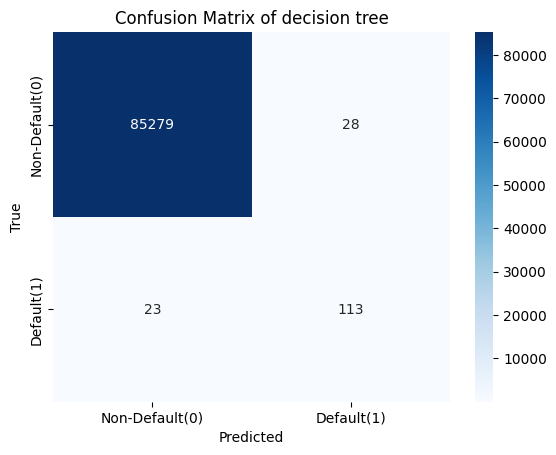

In [50]:
class_label = ['Non-Default(0)','Default(1)']
sns.heatmap(cm,annot=True,fmt='d',xticklabels=class_label, yticklabels=class_label, cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix of decision tree")
plt.show()